In [1]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The dataset is from Hugging Face dataset library at the following links:

https://huggingface.co/datasets/calabi-yau-data/polytopes-4d

https://huggingface.co/datasets/calabi-yau-data/ws-5d (5d polytope)

however, trying to load the 4d polytopes dataset always give a TypeError.

In [2]:
#!pip install datasets
#!pip show datasets

#from datasets import load_dataset
#this return a TypeError
#dataset = load_dataset("calabi-yau-data/polytopes-4d")

# Load data

In [3]:
path = '/kaggle/input/kreuzer-skarke-4d-polytopes/'
df1 = pd.read_parquet(path+'polytopes-4d-08-vertices.parquet')
df2 = pd.read_parquet(path+'polytopes-4d-09-vertices.parquet')

In [4]:
df1.columns

Index(['vertices', 'vertex_count', 'facet_count', 'point_count',
       'dual_point_count', 'h11', 'h12', 'euler_characteristic'],
      dtype='object')

In [5]:
len(df1), len(df2), len(df1)+len(df2)

(834638, 2867955, 3702593)

In [6]:
df = pd.concat([df1, df2], ignore_index=True)
len(df)==len(df1)+len(df2)

True

In [7]:
df

,vertices,vertex_count,facet_count,point_count,dual_point_count,h11,h12,euler_characteristic
0,"[[1, 0, 0, 0], [1, 2, 0, 0], [1, 2, 4, 0], [1,...",8,6,102,7,2,84,-164
1,"[[1, 0, 0, 0], [1, 2, 0, 0], [1, 0, 4, 0], [1,...",8,6,105,7,2,86,-168
2,"[[1, 0, 0, 0], [1, 4, 0, 0], [1, 0, 4, 0], [0,...",8,6,105,7,2,86,-168
3,"[[1, 0, 0, 0], [0, 1, 0, 0], [3, 2, 4, 0], [3,...",8,6,106,7,2,86,-168
4,"[[1, 0, 0, 0], [1, 3, 0, 0], [1, 0, 3, 0], [1,...",8,6,111,7,2,90,-176
...,...,...,...,...,...,...,...,...
3702588,"[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [-7...",9,9,243,237,168,174,-12
3702589,"[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0,...",9,9,275,249,178,196,-36
3702590,"[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0,...",9,9,249,275,196,178,36
3702591,"[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0,...",9,9,251,251,179,179,0


# EDA

## Vertices

In [8]:
 df.vertices.iloc[0].dtype, df.vertices.iloc[0]

(dtype('O'),
 array([array([1, 0, 0, 0], dtype=int32), array([1, 2, 0, 0], dtype=int32),
        array([1, 2, 4, 0], dtype=int32), array([1, 2, 0, 4], dtype=int32),
        array([ 0,  1, -1, -1], dtype=int32),
        array([ 0,  1,  4, -1], dtype=int32),
        array([ 0,  1, -1,  4], dtype=int32),
        array([-5, -9, -6, -6], dtype=int32)], dtype=object))

In [9]:
df['vertex_count'].nunique(),df['vertex_count'].unique()

(2, array([8, 9], dtype=int32))

In [10]:
df['facet_count'].unique()

array([ 6,  7, 12, 16, 14, 15, 13, 17, 11, 10,  9, 18,  8, 19, 20, 21, 24,
       23], dtype=int32)

In [11]:
df['point_count'].nunique(), df['point_count'].unique()

(471,
 array([102, 105, 106, 111, 129, 130, 136, 156, 159,  81,  80,  85,  88,
         90,  94,  87,  99, 100, 110, 120, 126, 122, 131, 132, 144, 147,
        153, 155, 171, 224, 214, 186,  29,   9,  53,  57,  59,  63,  74,
         66,  64,  10,  69,  75,  76,  70,  91,  79,  86,  96,  92, 103,
        107, 114, 115, 112,  95, 113, 117, 108, 123, 124,  97, 116, 127,
        137, 139, 141, 134, 140, 143, 145, 154, 169, 177, 175, 182, 172,
        200, 166, 191, 226, 262, 277, 275, 293, 311,  37,  42,  46,  52,
         47,  51,  55,  56,  58,  62,  11,  65,  67,  12,  61,  71,  83,
         78,  84,  89,  93,  68,  82, 101, 104, 118, 125, 119, 128, 135,
        138, 142, 160, 158, 161, 163,  13, 162, 183, 185, 188, 219, 221,
        222, 236, 234, 241, 253, 251, 254, 270, 271, 281, 288, 294,  33,
         41,  45,  49,  44,  48,  50,  54,  14,  60,  72,  77,  73,  98,
        133,  15, 148, 149, 152, 146, 165, 174, 109, 173, 178, 167, 180,
        179, 196, 208, 210, 211, 212, 194, 20

## Hodge number h11

In [12]:
df['h11'].nunique(), df['h11'].unique()

(349,
 array([  2,   3,   4,  28,  36,  44,  46,  49,  52,  54,  55,  56,  58,
         59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
         72,  73,  74,  76,  77,  78,  79,  80,  81,  82,  84,  85,  86,
         88,  89,  90,  91,  92,  93,  94,  96,  97,  98, 100, 101, 102,
        104, 106, 108, 110, 112, 114, 116, 118, 121, 124, 128,   5,  35,
         37,  39,  40,  41,  43,  45,  47,  50,  51,  53,  57,  75,  83,
         87,  95,  99, 103, 105, 107, 109, 111, 113, 115, 117, 119, 122,
        123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 149,
        153, 161, 165, 173, 177, 179, 185, 189, 197, 201, 215,  26,   6,
         30,  32,  33,  34,  38,  42,  48, 120, 126, 132, 136, 138, 140,
        142, 144, 148, 150, 152, 156, 160, 162, 164, 168, 171, 172, 174,
        176, 180, 182, 184, 186, 192, 196, 198, 204, 210,   7,  27,  29,
         31, 147, 151, 154, 155, 157, 159, 163, 167, 169, 175, 178, 181,
        183, 187, 193, 199, 205, 211, 217, 21

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='h11', ylabel='Count'>

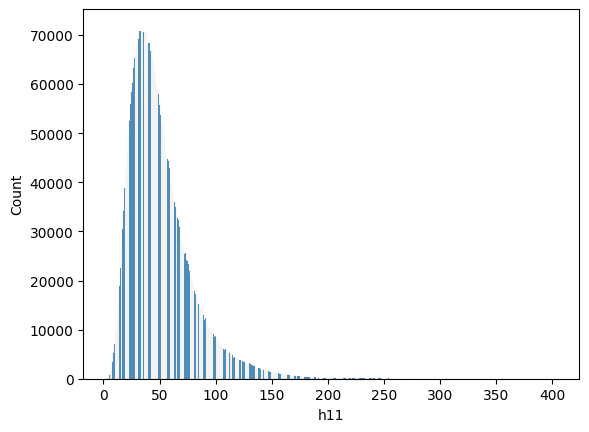

In [13]:
sns.histplot(data=df, x="h11")

In [14]:
df.h11.describe()

count    3.702593e+06
mean     5.117092e+01
std      2.863529e+01
min      2.000000e+00
25%      3.100000e+01
50%      4.500000e+01
75%      6.400000e+01
max      4.040000e+02
Name: h11, dtype: float64

## Hodge number h12

In [15]:
df['h12'].nunique(), df['h12'].unique()

(349,
 array([ 84,  86,  90, 102, 106, 122,  69,  72,  73,  75,  77,  81,  87,
         99, 111, 115, 127, 165,  28,   4,  44,  52,  58,  60,  64,  66,
         68,  70,  74,  76,  80,  82,  88,  94,  98, 100, 104, 108, 110,
        112, 114, 116, 128, 130, 136, 148, 166, 194, 202, 214, 226,  35,
          5,  39,  41,  43,  47,  49,  51,  53,  55,  59,  61,  62,  63,
         65,  67,  71,  79,  83,  85,  89,  91,  93,  95,  97, 101, 105,
        107, 109, 113, 119, 125, 133, 135, 137, 139, 161, 173, 179, 185,
        197, 205, 209, 213,   6,  30,  34,  38,  42,  46,  48,  50,  54,
         78,  92,  96, 118, 120, 124, 126, 132, 138, 142, 144, 150, 152,
        156, 160, 162, 168, 174, 176, 180, 182, 186, 188, 192, 204, 210,
        222, 228, 248,  25,   7,  27,  29,  31,  33,  37,  40,  45,  57,
        103, 121, 123, 131, 141, 143, 145, 147, 151, 153, 155, 157, 159,
        163, 167, 169, 171, 175, 181, 187, 193, 199, 223, 247,   8,  26,
         32,  36,  56, 134, 140, 146, 154, 15

In [16]:
df.h12.describe()

count    3.702593e+06
mean     3.779034e+01
std      2.808243e+01
min      4.000000e+00
25%      1.900000e+01
50%      3.000000e+01
75%      4.700000e+01
max      4.040000e+02
Name: h12, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='h12', ylabel='Count'>

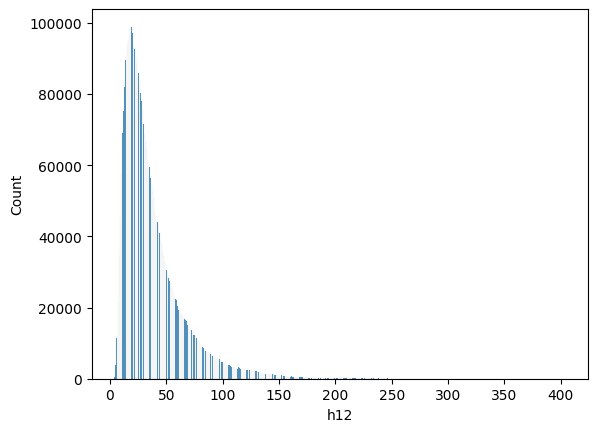

In [17]:
sns.histplot(data=df, x="h12")

## Euler Characteristic = 2*h11 - 2*h12

In [18]:
#this column is identical to the Euler characteristic 
df['2h11-2h12'] = 2*df['h11'] - 2*df['h12']
df['2h11-2h12']==df['euler_characteristic']

0          True
1          True
2          True
3          True
4          True
           ... 
3702588    True
3702589    True
3702590    True
3702591    True
3702592    True
Length: 3702593, dtype: bool

# Prepare data for training

In [19]:
df.columns[-4:]

Index(['h11', 'h12', 'euler_characteristic', '2h11-2h12'], dtype='object')

In [20]:
dfy = df['h11']
y = dfy.to_numpy()
y

array([  2,   2,   2, ..., 196, 179, 195], dtype=int32)

# Get rid of the strange format for 'vertices'

In [21]:
x_ver = df1['vertices'].to_numpy()

In [22]:
x_ver.shape, x_ver[0].shape

((834638,), (8,))

In [23]:
#get rid of the strange format with dtype=object
#make sure the shape is a square for easy convolution
x8 = np.zeros((len(df1), 8, 8))
for i in range(len(df1)):
    for j in range(8):
        for k in range(4):
            x8[i, j, k] = x_ver[i][j][k]

# Model building: Polytopes with 8 vertices

We will train an ANN or a CNN to predict the h11 value of the polytopes with 8 vertices first. The only input is the vertices list and nothing else. 

In [24]:
x8[0], x8[10], x8[-10], x8[-1]

(array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  2.,  4.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  2.,  0.,  4.,  0.,  0.,  0.,  0.],
        [ 0.,  1., -1., -1.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  4., -1.,  0.,  0.,  0.,  0.],
        [ 0.,  1., -1.,  4.,  0.,  0.,  0.,  0.],
        [-5., -9., -6., -6.,  0.,  0.,  0.,  0.]]),
 array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  4.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -4.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  4., -4.,  1.,  0.,  0.,  0.,  0.],
        [-1., -4.,  4., -2.,  0.,  0.,  0.,  0.],
        [-4., -4., -8.,  1.,  0.,  0.,  0.,  0.]]),
 array([[  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,  

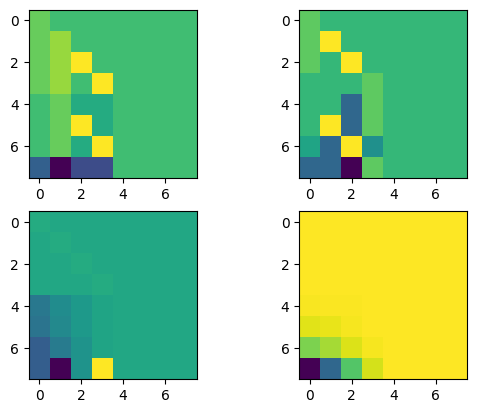

In [25]:
#plt.figsize((12,12))
fig, axs = plt.subplots(2, 2)
axs[0,0].imshow(x8[0])
axs[0,1].imshow(x8[10])
axs[1,0].imshow(x8[-10])
axs[1,1].imshow(x8[-1])

# Train test split

In [26]:
y8 = y[:len(df1)]
y8.dtype

dtype('int32')

In [27]:
#Need to normalize the data
x8.shape, y8.shape

((834638, 8, 8), (834638,))

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test  = train_test_split(x8, y8, test_size=0.2,  random_state=42, shuffle=True)

In [30]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((667710, 8, 8), (667710,), (166928, 8, 8), (166928,))

# Build models

In [31]:
import torch
import torchvision

import torch.nn as nn
import torch.nn.functional as F
from torchvision.utils import make_grid
#from torchvision import transforms, datasets
#from torch.utils.data import Dataset
from torch.utils.data.dataloader import DataLoader

from torch.utils.data import random_split
from sklearn.utils import shuffle


In [32]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

print(device)

cuda:0


In [33]:
X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))

X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [34]:
if not os.path.exists('saved_models'):
    os.makedirs('saved_models')

## ANN

In [35]:
class ANN_KS_h11(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.flat = nn.Flatten()
        self.linear1 = nn.Linear(64,1024)
        self.linear2 = nn.Linear(1024,512)
        self.linear3 = nn.Linear(512,256)
        self.linear4 = nn.Linear(256,64)
        self.linear5 = nn.Linear(64,1)

    def forward(self,x):
        x = self.flat(x)
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = F.relu(self.linear4(x))
        x = self.linear5(x)
        
        return x

## CNN

In [36]:
class CNN_KS_h11(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,64, 3, 1)
        self.conv2 = nn.Conv2d(64,32, 2, 1)
        self.mxpool = nn.MaxPool2d(2,2)
        self.flat = nn.Flatten()
        self.conv_total = nn.Sequential(
            self.conv1,
            self.mxpool,
            self.conv2,
            self.mxpool
        )
        
        self.linear1 = nn.Linear(32,1024)
        self.linear2 = nn.Linear(1024,512)
        self.linear3 = nn.Linear(512,128)
        self.linear4 = nn.Linear(128,1)

    def forward(self,x):
        x = F.relu(self.conv_total(x))
        x = self.flat(x)
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = self.linear4(x)
        
        return x

## Define a function for the train loop

In [37]:
from datetime import datetime
def batch_gd(model, criterion, optimizer, X_train, y_train, X_test, y_test, epochs, batch_size, cnn=False):
  train_losses = []
  test_losses = []

  for it in range(epochs):
    model.train()
    t0 = datetime.now()
    train_loss = []
    for n in range(len(X_train)//batch_size):    
        data = X_train[n*batch_size:(n+1)*batch_size]
        target = y_train[n*batch_size:(n+1)*batch_size]
        if cnn:
            data = data.view(batch_size,1,8,8)
        data,target = data.to(device), target.to(device)
       
        #Perform the prediction
        ypred = model(data.float())
        loss = criterion(ypred,target)
        #Training steps
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss.append(loss.item())

    # Get train loss and test loss
    train_loss = np.mean(train_loss) 
    
    model.eval()
    test_loss = []
    total_test_loss = 0
    for n in range(len(X_test)//batch_size):    
        data = X_test[n*batch_size:(n+1)*batch_size]
        target = y_test[n*batch_size:(n+1)*batch_size]
        if cnn:
            data = data.view(batch_size,1,8,8)
        data,target = data.to(device), target.to(device)
        y_pred_test = model(data.float())
        loss = criterion(y_pred_test, target)
        test_loss.append(loss.item())
    
    test_loss = np.mean(test_loss)
    # Save losses
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    dt = datetime.now() - t0
    if it%5==0:
        print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
          Test Loss: {test_loss:.4f}, Duration: {dt}')
    
  return train_losses, test_losses

In [38]:
# CALCULATING ACCURACY
# Accuracy
def calc_accuracy(model, cnn = False):
    model.eval()
    n_correct = 0.
    n_total = 0.
    batch_size =128
    for n in range(len(X_train)//batch_size):    
        data = X_train[n*batch_size:(n+1)*batch_size]
        target = y_train[n*batch_size:(n+1)*batch_size]
        if cnn:
            data = data.view(batch_size,1,8,8)
        data,target = data.to(device), target.to(device)

        #Perform the prediction
        ypred = model(data.float())
        # update counts
        n_correct += (ypred == target).sum().item()
        n_total += target.shape[0]

    train_acc = n_correct / n_total

    #TEST SET
    n_correct = 0.
    n_total = 0.
    for n in range(len(X_test)//batch_size):    
        data = X_test[n*batch_size:(n+1)*batch_size]
        target = y_test[n*batch_size:(n+1)*batch_size]
        if cnn:
            data = data.view(batch_size,1,8,8)
        data,target = data.to(device), target.to(device)
       # Forward pass
        ypred_test = model(data.float())
       # update counts
        n_correct += (ypred_test == target).sum().item()
        n_total += target.shape[0]

    test_acc = n_correct / n_total

    return train_acc, test_acc
    

# CNN model: Training & Evaluation

In [39]:
model_cnn = CNN_KS_h11()

In [40]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model_cnn.to(device)

cuda:0


CNN_KS_h11(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(64, 32, kernel_size=(2, 2), stride=(1, 1))
  (mxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
  (conv_total): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(64, 32, kernel_size=(2, 2), stride=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear1): Linear(in_features=32, out_features=1024, bias=True)
  (linear2): Linear(in_features=1024, out_features=512, bias=True)
  (linear3): Linear(in_features=512, out_features=128, bias=True)
  (linear4): Linear(in_features=128, out_features=1, bias=True)
)

In [41]:
X = X_train[0].to(device)
print(f'Original shape of the image before passing through the network: \n {X.shape}\n')
print('Reshape the size to take in account the batch number')
X = X.view(1,1,8,8)
print(f'The new size is {X.shape}\n')
X = model_cnn.conv_total(X)
print(f'Shape of the image after passing through the whole convolution block: \n {X.shape}\n')

X = model_cnn.flat(X)
print(f'Shape of the image after passing through the {model_cnn.flat}: \n {X.shape}\n')

X = model_cnn.linear1(X)
print(f'Shape of the image after passing through the {model_cnn.linear1}: \n {X.shape}\n')

X = model_cnn.linear2(X)
print(f'Shape of the image after passing through the {model_cnn.linear2}: \n {X.shape}\n')

X = model_cnn.linear3(X)
print(f'Shape of the image after passing through the {model_cnn.linear3}: \n {X.shape}\n')

X = model_cnn.linear4(X)
print(f'Shape of the image after passing through the {model_cnn.linear4}: \n {X.shape}\n')

Original shape of the image before passing through the network: 
 torch.Size([8, 8])

Reshape the size to take in account the batch number
The new size is torch.Size([1, 1, 8, 8])

Shape of the image after passing through the whole convolution block: 
 torch.Size([1, 32, 1, 1])

Shape of the image after passing through the Flatten(start_dim=1, end_dim=-1): 
 torch.Size([1, 32])

Shape of the image after passing through the Linear(in_features=32, out_features=1024, bias=True): 
 torch.Size([1, 1024])

Shape of the image after passing through the Linear(in_features=1024, out_features=512, bias=True): 
 torch.Size([1, 512])

Shape of the image after passing through the Linear(in_features=512, out_features=128, bias=True): 
 torch.Size([1, 128])

Shape of the image after passing through the Linear(in_features=128, out_features=1, bias=True): 
 torch.Size([1, 1])



In [42]:
#count the number of parameters in the model
params = [p.numel() for p in model_cnn.parameters() if p.requires_grad]
for item in params:
    print(f'{item:>8}')
print(f'________\n{sum(params):>8}')

     576
      64
    8192
      32
   32768
    1024
  524288
     512
   65536
     128
     128
       1
________
  633249


In [43]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_cnn.parameters())

In [44]:
train_losses, test_losses=batch_gd(model_cnn, criterion, optimizer, X_train, y_train, X_test, y_test, 100, 128, cnn=True)

Epoch 1/100, Train Loss: 104.4047,           Test Loss: 55.7957, Duration: 0:00:15.039262
Epoch 6/100, Train Loss: 27.8506,           Test Loss: 26.4623, Duration: 0:00:14.328279
Epoch 11/100, Train Loss: 22.5921,           Test Loss: 21.3728, Duration: 0:00:14.284642
Epoch 16/100, Train Loss: 19.9104,           Test Loss: 19.6937, Duration: 0:00:14.210809
Epoch 21/100, Train Loss: 18.2243,           Test Loss: 17.9391, Duration: 0:00:14.083778
Epoch 26/100, Train Loss: 16.9978,           Test Loss: 17.3124, Duration: 0:00:14.066679
Epoch 31/100, Train Loss: 15.9808,           Test Loss: 16.7978, Duration: 0:00:14.247125
Epoch 36/100, Train Loss: 15.2006,           Test Loss: 17.0030, Duration: 0:00:14.253163
Epoch 41/100, Train Loss: 14.5311,           Test Loss: 17.8575, Duration: 0:00:14.263401
Epoch 46/100, Train Loss: 13.9404,           Test Loss: 18.1998, Duration: 0:00:14.263923
Epoch 51/100, Train Loss: 13.4433,           Test Loss: 16.9211, Duration: 0:00:14.230581
Epoch 56/10

In [45]:
# SAVE MODEL FOR INFERENCE
#https://pytorch.org/tutorials/beginner/saving_loading_models.html
torch.save(model_cnn, '/kaggle/working/saved_models/CNN_h11.pt')
#model = torch.load(PATH)
#model.eval()

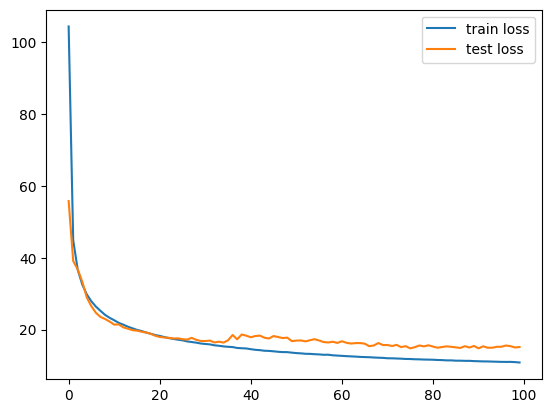

In [46]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [47]:
train_acc, test_acc = calc_accuracy(model_cnn, cnn= True)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.0000, Test acc: 0.0000


# ANN: Training and Evaluation

In [48]:
model_ann = ANN_KS_h11()

In [49]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model_ann.to(device)

cuda:0


ANN_KS_h11(
  (flat): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=64, out_features=1024, bias=True)
  (linear2): Linear(in_features=1024, out_features=512, bias=True)
  (linear3): Linear(in_features=512, out_features=256, bias=True)
  (linear4): Linear(in_features=256, out_features=64, bias=True)
  (linear5): Linear(in_features=64, out_features=1, bias=True)
)

In [50]:
#count the number of parameters in the model
params = [p.numel() for p in model_ann.parameters() if p.requires_grad]
for item in params:
    print(f'{item:>8}')
print(f'________\n{sum(params):>8}')

   65536
    1024
  524288
     512
  131072
     256
   16384
      64
      64
       1
________
  739201


In [51]:
X = X_train[0].to(device)
print(f'Original shape of the image before passing through the network: \n {X.shape}\n')
print('Reshape the size to take in account the batch number')
X = X.view(1,1,8,8)
print(f'The new size is {X.shape}\n')

X = model_ann.flat(X)
print(f'Shape of the image after passing through the {model_ann.flat}: \n {X.shape}\n')

X = model_ann.linear1(X)
print(f'Shape of the image after passing through the {model_ann.linear1}: \n {X.shape}\n')

X = model_ann.linear2(X)
print(f'Shape of the image after passing through the {model_ann.linear2}: \n {X.shape}\n')

X = model_ann.linear3(X)
print(f'Shape of the image after passing through the {model_ann.linear3}: \n {X.shape}\n')
X = model_ann.linear4(X)
print(f'Shape of the image after passing through the {model_ann.linear4}: \n {X.shape}\n')
X = model_ann.linear5(X)
print(f'Shape of the image after passing through the {model_ann.linear5}: \n {X.shape}\n')

Original shape of the image before passing through the network: 
 torch.Size([8, 8])

Reshape the size to take in account the batch number
The new size is torch.Size([1, 1, 8, 8])

Shape of the image after passing through the Flatten(start_dim=1, end_dim=-1): 
 torch.Size([1, 64])

Shape of the image after passing through the Linear(in_features=64, out_features=1024, bias=True): 
 torch.Size([1, 1024])

Shape of the image after passing through the Linear(in_features=1024, out_features=512, bias=True): 
 torch.Size([1, 512])

Shape of the image after passing through the Linear(in_features=512, out_features=256, bias=True): 
 torch.Size([1, 256])

Shape of the image after passing through the Linear(in_features=256, out_features=64, bias=True): 
 torch.Size([1, 64])

Shape of the image after passing through the Linear(in_features=64, out_features=1, bias=True): 
 torch.Size([1, 1])



In [52]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_ann.parameters())

In [53]:
train_losses, test_losses=batch_gd(model_ann, criterion, optimizer, X_train, y_train, X_test, y_test, 100, 128, cnn=False)

Epoch 1/100, Train Loss: 119.8198,           Test Loss: 45.1875, Duration: 0:00:11.727014
Epoch 6/100, Train Loss: 20.1467,           Test Loss: 16.0588, Duration: 0:00:11.824201
Epoch 11/100, Train Loss: 14.5286,           Test Loss: 12.5764, Duration: 0:00:11.762681
Epoch 16/100, Train Loss: 12.1357,           Test Loss: 11.2150, Duration: 0:00:11.681516
Epoch 21/100, Train Loss: 10.3599,           Test Loss: 10.7549, Duration: 0:00:11.735964
Epoch 26/100, Train Loss: 9.4235,           Test Loss: 9.8894, Duration: 0:00:11.891782
Epoch 31/100, Train Loss: 8.6322,           Test Loss: 9.5419, Duration: 0:00:12.001624
Epoch 36/100, Train Loss: 8.2053,           Test Loss: 9.2052, Duration: 0:00:11.786431
Epoch 41/100, Train Loss: 7.7056,           Test Loss: 8.9609, Duration: 0:00:11.932575
Epoch 46/100, Train Loss: 7.2681,           Test Loss: 8.6737, Duration: 0:00:11.577729
Epoch 51/100, Train Loss: 7.0178,           Test Loss: 8.6691, Duration: 0:00:11.773735
Epoch 56/100, Train Los

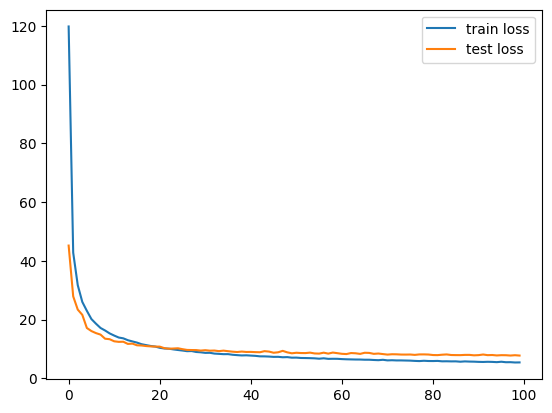

In [54]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [55]:
train_acc, test_acc = calc_accuracy(model_ann, cnn= False)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.0000, Test acc: 0.0000


In [56]:
# SAVE MODEL FOR INFERENCE
#https://pytorch.org/tutorials/beginner/saving_loading_models.html
torch.save(model_ann, '/kaggle/working/saved_models/ANN_h11.pt')
#model = torch.load(PATH)
#model.eval()